In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importing necessary libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential ,Model
import pathlib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import PIL
import pathlib
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
pip install --upgrade tensorflow

Define the path to the dataset and the folders


In [ ]:

path = pathlib.Path("/content/drive/MyDrive/project image")

org = list(path.glob("O/*"))
rec = list(path.glob("R/*"))
other = list(path.glob("E/*"))

 Define function to read and process images


In [ ]:
import tensorflow as tf

def process_image(image_path):
  try:
    img = tf.io.read_file(str(image_path))
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (150, 150))
    img = img / 255.0
    return img
  except tf.errors.InvalidArgumentError:
        print("Skipping file:", image_path)
        return None

images = []
labels = []

for img_path in org:
    img = process_image(img_path)
    if img is not None:
        images.append(img)
        labels.append(0)

for img_path in rec:
    img = process_image(img_path)
    if img is not None:
        images.append(img)
        labels.append(1)

for img_path in other:
    img = process_image(img_path)
    if img is not None:
        images.append(img)
        labels.append(2)

Skipping file: /content/drive/MyDrive/project image/E/636364539543570882-Junk-08.jpeg
Skipping file: /content/drive/MyDrive/project image/E/596f8aadc50c2931008b5381.jpeg
Skipping file: /content/drive/MyDrive/project image/E/4ffaae26c38a4923bee02805b70c4acf_18.jpeg
Skipping file: /content/drive/MyDrive/project image/E/in-phone.jpeg
Skipping file: /content/drive/MyDrive/project image/E/original.jpeg


Load images and labels


In [ ]:
images = np.array(images)
labels = np.array(labels)

In [ ]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=len(train_images) / 32,
                    epochs=20,
                    validation_data=(test_images, test_labels))

# Transfer Learning (Example using pre-trained ResNet50)
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(train_images, train_labels, epochs=20, batch_size=32,
          validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
71/71 [==============================] - 149s 2s/step - loss: 0.5941 - accuracy: 0.7657 - val_loss: 0.4321 - val_accuracy: 0.8569
Epoch 2/20
71/71 [==============================] - 144s 2s/step - loss: 0.4033 - accuracy: 0.8588 - val_loss: 0.5325 - val_accuracy: 0.8272
Epoch 3/20
71/71 [==============================] - 142s 2s/step - loss: 0.3697 - accuracy: 0.8645 - val_loss: 0.3126 - val_accuracy: 0.8778
Epoch 4/20
71/71 [==============================] - 143s 2s/step - loss: 0.3269 - accuracy: 0.8785 - val_loss: 0.3490 - val_accuracy: 0.8639
Epoch 5/20
71/71 [==============================] - 145s 2s/step - loss: 0.3403 - accuracy: 0.8811 - val_loss: 0.3738 - val_accuracy: 0.8639
Epoch 6/20
71/71 [==============================] - 151s 2s/step - loss: 0.2933 - accuracy: 0.8885 - val_loss: 0.2786 - val_accuracy: 0.8935
Epoch 7/20
71/71 [==============================] - 142s 2s/step - loss: 0.2842 - accuracy: 0.9043 - val_loss: 0.2655 - val_accuracy: 0.9058
Epoch 8/20
71

data augumentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train test split

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
train_images.shape

(2288, 150, 150, 3)

In [ ]:
test_images.shape

(573, 150, 150, 3)

apply augumentation on training data set

In [ ]:
train_data_gen = datagen.flow(train_images, train_labels, batch_size=32)

random shuffle

In [ ]:
idx = np.random.permutation(len(images))
images, labels = images[idx], labels[idx]

define and compile CNN model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

fitting and evaluating the model

In [ ]:
history = model.fit(train_data_gen,
                    steps_per_epoch=len(train_images) / 32,
                    epochs=20,
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)



Skipping file: /content/drive/MyDrive/project image/E/636364539543570882-Junk-08.jpeg
Skipping file: /content/drive/MyDrive/project image/E/596f8aadc50c2931008b5381.jpeg
Skipping file: /content/drive/MyDrive/project image/E/4ffaae26c38a4923bee02805b70c4acf_18.jpeg
Skipping file: /content/drive/MyDrive/project image/E/in-phone.jpeg
Skipping file: /content/drive/MyDrive/project image/E/original.jpeg
Epoch 1/20
71/71 [==============================] - 198s 3s/step - loss: 0.6343 - accuracy: 0.7426 - val_loss: 0.4451 - val_accuracy: 0.8482
Epoch 2/20
71/71 [==============================] - 226s 3s/step - loss: 0.4052 - accuracy: 0.8663 - val_loss: 0.4681 - val_accuracy: 0.8360
Epoch 3/20
71/71 [==============================] - 231s 3s/step - loss: 0.3649 - accuracy: 0.8763 - val_loss: 0.3710 - val_accuracy: 0.8691
Epoch 4/20
71/71 [==============================] - 170s 2s/step - loss: 0.3400 - accuracy: 0.8833 - val_loss: 0.3041 - val_accuracy: 0.8918
Epoch 5/20
71/71 [=================

evaluating using accuracy_score

In [ ]:
predictions = model.predict(test_images)

predicted_labels = np.argmax(predictions, axis=1)

accuracy = accuracy_score(test_labels, predicted_labels)

print('Accuracy on test data:', accuracy)


18/18 [==============================] - 53s 3s/step
Accuracy on test data: 0.7801047120418848


In [ ]:
idx = np.random.permutation(len(images))
images, labels = images[idx], labels[idx]

summary

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
model.save('mymodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('/content/drive/MyDrive/mymodel.h5')

plot

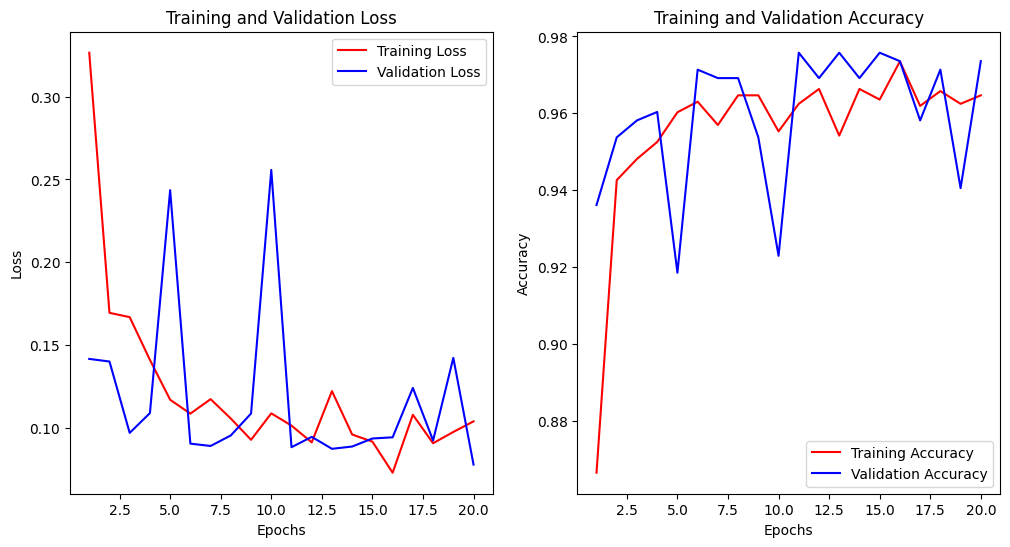

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

predicting the test set

In [ ]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print(predicted_labels)


18/18 [==============================] - 12s 696ms/step
[1 1 0 1 0 0 0 1 2 2 2 1 2 0 1 0 0 0 0 0 0 1 1 0 2 1 2 0 1 2 1 0 0 1 1 0 1
 0 0 0 2 0 0 1 2 0 0 0 0 0 0 2 2 0 2 1 1 2 0 1 0 0 2 0 0 1 2 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 0 2 1 1 2 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 2 2 0 0 1 0
 2 1 1 0 1 0 0 2 1 1 1 0 1 0 0 0 1 2 0 2 2 0 1 1 0 0 1 1 0 1 0 1 2 0 1 0 0
 0 0 1 0 0 2 0 2 0 1 0 0 0 2 2 2 0 0 2 2 2 0 0 0 1 0 2 1 2 2 0 1 0 0 1 1 0
 0 2 2 0 0 1 0 0 0 2 1 0 0 0 2 1 0 2 0 2 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 2 0
 2 2 2 2 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 2 0 1 1 0 0 0 1 2 2 0 0 2 2 0 0 0 2
 2 2 1 2 0 1 2 0 0 0 0 0 2 0 1 1 2 1 0 1 0 0 0 1 1 2 1 0 2 1 2 0 0 0 0 0 2
 1 0 0 0 1 0 0 1 2 0 1 0 0 0 0 2 1 0 0 0 2 1 1 2 0 0 2 0 1 0 1 1 1 0 0 0 1
 0 0 0 2 0 0 1 2 2 0 0 0 0 0 0 0 1 1 1 1 2 2 1 2 0 1 1 0 0 0 0 2 0 0 0 1 1
 0 0 2 0 1 0 0 2 1 0 0 0 1 1 0 0 0 0 2 2 0 0 1 0 1 2 0 2 2 0 1 1 0 1 0 0 2
 1 1 0 1 0 0 0 0 0 2 2 0 0 2 0 0 0 2 0 0 2 0 2 0 0 0 1 0 0 0 1 2 1 2 1 0 2
 1 0 2 1 0 2 2 1 2 0 0 0 0 0 0 1 0 0 0 0 0 1

classification report

In [ ]:
print("Classification Report:\n", classification_report(test_labels, predicted_labels))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       296
           1       0.97      0.95      0.96       158

    accuracy                           0.97       454
   macro avg       0.97      0.97      0.97       454
weighted avg       0.97      0.97      0.97       454



confusion matrix

18/18 [==============================] - 7s 373ms/step


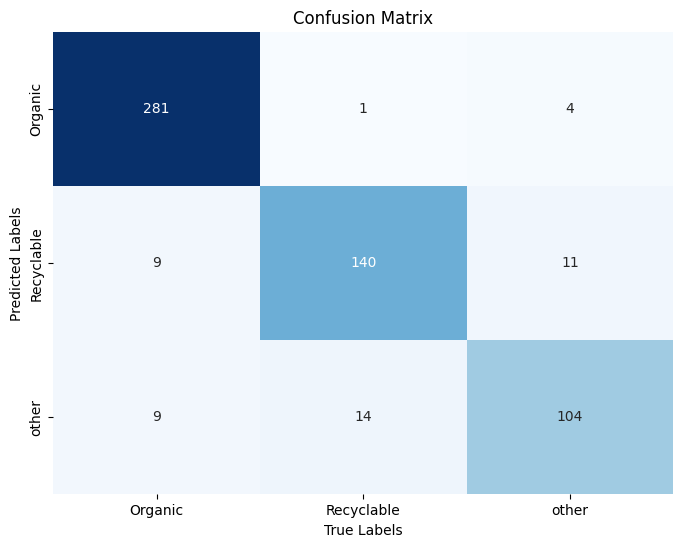

In [ ]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Organic', 'Recyclable', 'other'],
            yticklabels=['Organic', 'Recyclable', 'other'])
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()
